# Clove

In [1]:
import numpy as np
import clove

In [2]:
a = clove.Variable(np.array([2,5]), requires_grad=True, name="a")
b = clove.Variable(np.array([3,8]), requires_grad=True, name="b")
c = a+b; c.retain_grad()
d = clove.sigmoid(c); d.retain_grad()
e = clove.exp(d); e.retain_grad()

In [3]:
e

Variable([2.70014952 2.71827568], requires_grad=True)

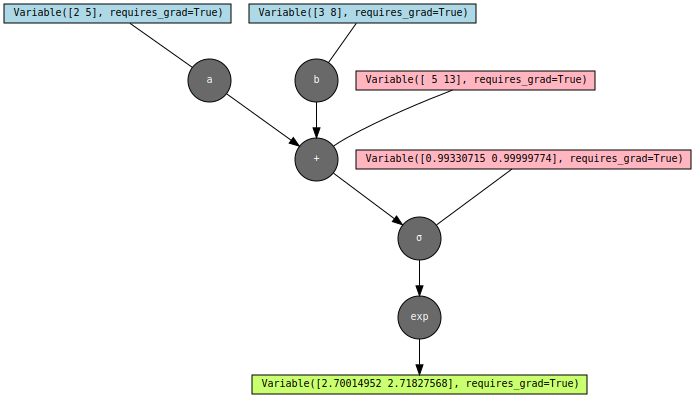

In [4]:
clove.dot.make_dot(e,show_grads=True,show_intermediate_outs=True)

In [5]:
e.data.shape

(2,)

In [6]:
e.backward(grad_output=clove.Variable(np.ones([2])))

Variable([0.99330715 0.99999774], requires_grad=True)
Variable([5.4184252])


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

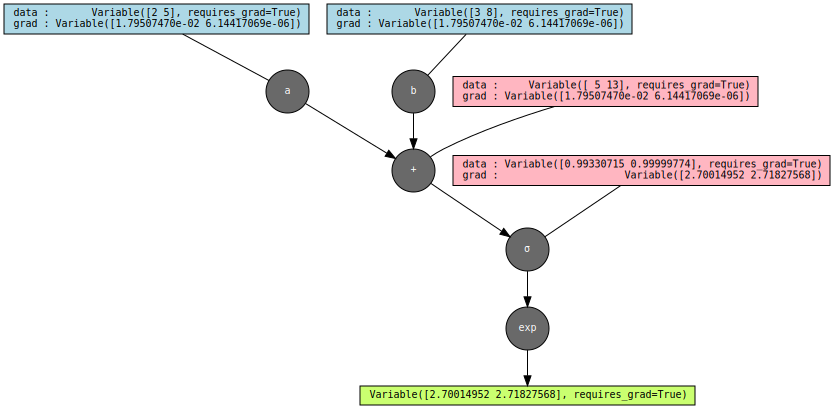

In [6]:
clove.dot.make_dot(e,show_grads=True,show_intermediate_outs=True)

# Pytorch

In [7]:
import torch

In [9]:
a1 = torch.tensor([2., 5.], requires_grad=True)

In [10]:
b1 = torch.tensor([3., 8.], requires_grad=True)

In [11]:
c1 = a1+b1;c1.retain_grad()
d1 = torch.sigmoid(c1);d1.retain_grad()
e1 = torch.exp(d1);e1.retain_grad()

In [16]:
e1.backward(torch.ones([2]))

In [22]:
c1.grad

tensor([1.7951e-02, 6.1568e-06])

In [17]:
e1

tensor([2.7001, 2.7183], grad_fn=<ExpBackward0>)

In [18]:
a1.grad

tensor([1.7951e-02, 6.1568e-06])

In [19]:
b1.grad

tensor([1.7951e-02, 6.1568e-06])

In [23]:
import numpy as np

In [27]:
a = np.ones((2,2))
b = np.ones((2,4))

In [29]:
np.multiply(a,b)

ValueError: operands could not be broadcast together with shapes (2,2) (2,4) 

In [8]:
a = torch.eye(3)

In [10]:
b = torch.randn(3,3)

In [11]:
b

tensor([[-0.3972, -0.7735,  2.1812],
        [ 0.2787,  0.4911, -0.3995],
        [-0.6469, -1.2749,  1.6395]])

In [14]:
a@b

tensor([[-0.3972, -0.7735,  2.1812],
        [ 0.2787,  0.4911, -0.3995],
        [-0.6469, -1.2749,  1.6395]])

In [3]:
import numpy as np

In [5]:
np.power([1,2,3],2)

array([1, 4, 9])

In [6]:
np.multiply(1,2)

2

In [8]:
type(np.matmul([1],[2]))

numpy.int64

In [9]:
from jax import numpy as jnp

In [10]:
jnp.abs(x=10)

DeviceArray(10, dtype=int32, weak_type=True)